Text(0, 0.5, 'Sepal width')

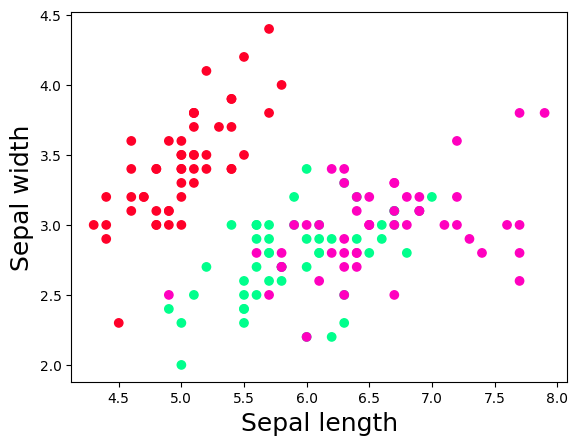

In [5]:
# page18

from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# data
iris = datasets.load_iris()

# feature & target
X = iris.data[:, :2]
y = iris.target

# raw data cmap
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)


In [7]:
# page20

km = KMeans(n_clusters=3, random_state=21) # 0.23 부터 n_jobs 삭제되었다고 합니다
km.fit(X)

centers = km.cluster_centers_
print(centers)

[[5.00392157 3.40980392]
 [5.8        2.7       ]
 [6.82391304 3.07826087]]


Text(0.5, 1.0, 'Predicted')

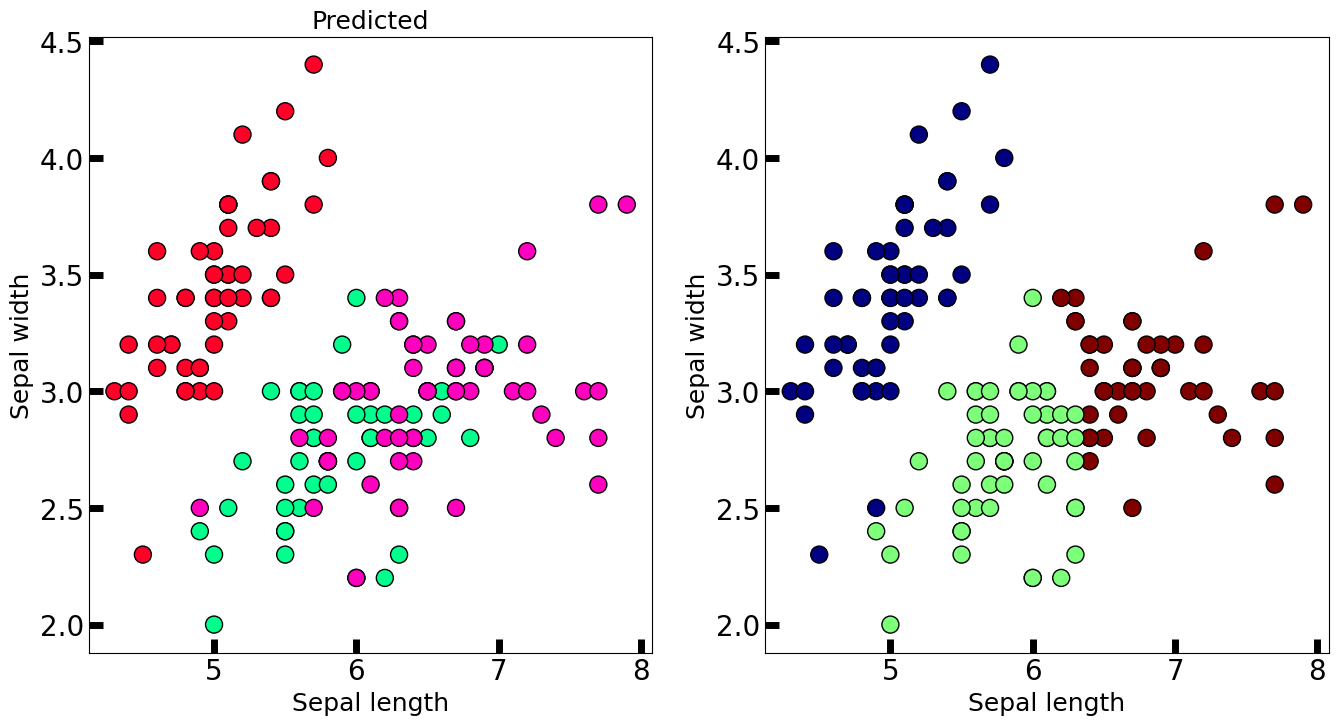

In [12]:
# page21

new_labels = km.labels_

fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(X[:,0], X[:,1], c=new_labels, cmap='jet', edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[0].set_title('Predicted', fontsize=18)

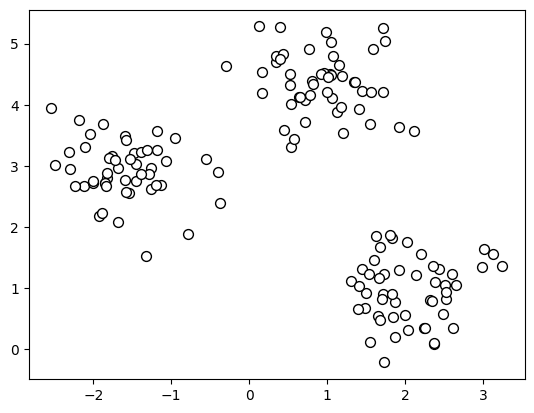

In [13]:
# page23

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(X[:,0], X[:,1], c='white', marker='o', edgecolor='black', s=50)
plt.show()

In [25]:
# page24

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
print("y_km:\n", y_km)

y_km:
 [2 1 1 1 2 1 1 2 0 1 2 0 0 1 1 0 0 2 0 2 1 2 1 1 0 2 2 1 0 2 0 0 0 0 1 2 2
 2 1 1 0 0 1 2 2 2 0 1 0 1 2 1 1 2 2 0 1 2 0 1 0 0 0 0 1 0 1 2 1 1 1 2 2 1
 2 1 1 0 0 1 2 2 1 1 2 2 2 0 0 2 2 1 2 1 2 1 0 0 2 2 2 2 0 2 2 1 0 1 1 1 0
 1 2 0 1 0 1 1 0 0 1 2 1 1 2 2 0 2 0 0 0 0 2 0 0 0 1 0 2 0 1 1 2 2 0 0 0 0
 2 2]


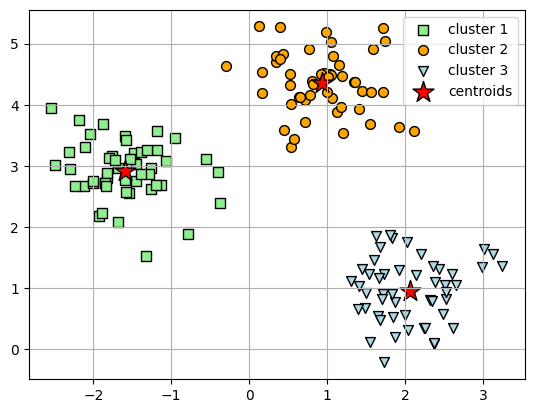

In [26]:
# page25

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

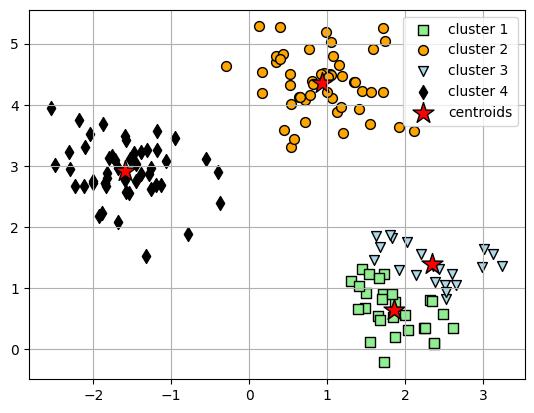

In [28]:
# page27

km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='black', marker='d', edgecolor='black', label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

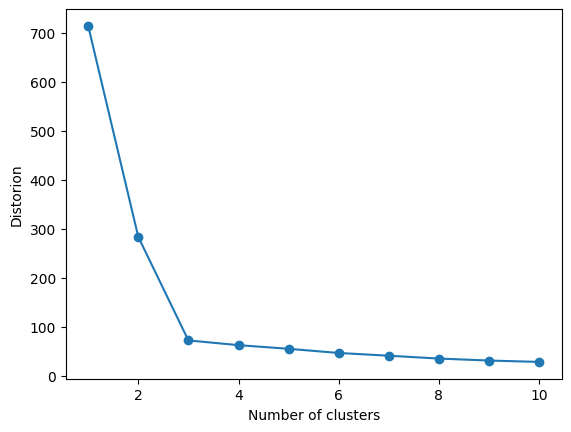

In [29]:
# page29

distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distorion')
plt.show()

In [30]:
# page46

from sklearn import datasets

from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [32]:
# page48

X = iris.data[:,[0,2]]
y = iris.target

print(X.shape)

feature_names = [iris.feature_names[0],iris.feature_names[2]]
print(feature_names)

df_X = pd.DataFrame(X)
print(df_X.head())

(150, 2)
['sepal length (cm)', 'petal length (cm)']
     0    1
0  5.1  1.4
1  4.9  1.4
2  4.7  1.3
3  4.6  1.5
4  5.0  1.4


In [33]:
# page49
print(y.shape)

df_Y = pd.DataFrame(y)
print(df_Y.head())

(150,)
   0
0  0
1  0
2  0
3  0
4  0


In [34]:
# page50

print(set(y))
print(iris.target_names)

{np.int64(0), np.int64(1), np.int64(2)}
['setosa' 'versicolor' 'virginica']


In [35]:
# page51

print(df_X.isnull().sum())
print(df_Y.isnull().sum())

0    0
1    0
dtype: int64
0    0
dtype: int64


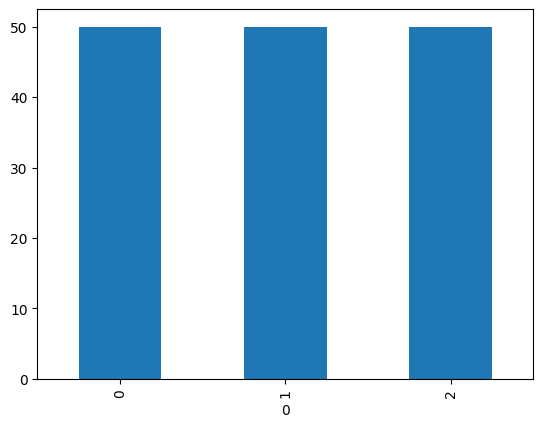

In [36]:
# page52

df_Y[0].value_counts().plot(kind='bar')
plt.show()

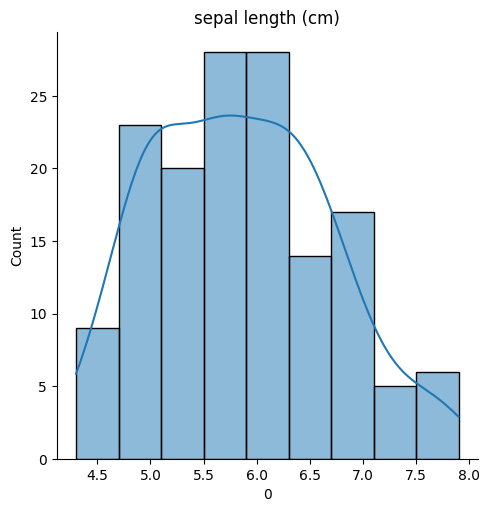

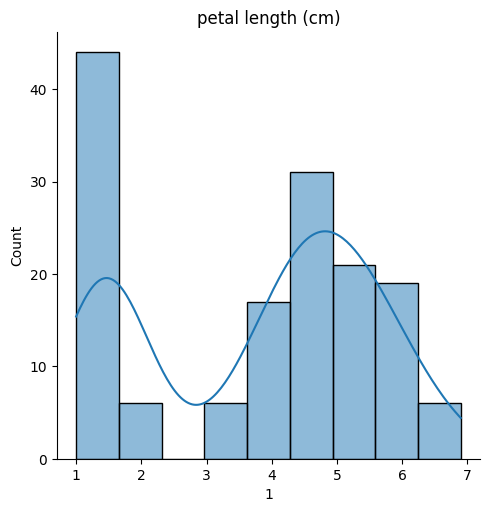

In [60]:
# page53

for i in range(df_X.shape[1]):
  sns.displot(df_X[i], kind='hist', kde=True)
  plt.title(feature_names[i])
  plt.show()

In [40]:
# page54

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [41]:
# page55
print(pca.explained_variance_)
PCscore = pca.transform(X)
print(PCscore[0:5])

[3.66189877 0.1400726 ]
[[-2.46024094  0.24479165]
 [-2.53896211  0.06093579]
 [-2.70961121 -0.08355948]
 [-2.56511594 -0.25420858]
 [-2.49960153  0.15286372]]


In [45]:
# page56

eigens_v = pca.components_.transpose()

mX = np.matrix(X)
for i in range(X.shape[i]):
  mX[:,i] = mX[:,i]-np.mean(X[:,1])

dfmX = pd.DataFrame(mX)

print((mX * eigens_v)[0:5])

[[-1.63944154  2.16179542]
 [-1.71816271  1.97793956]
 [-1.88881181  1.83344429]
 [-1.74431653  1.66279518]
 [-1.67880212  2.06986749]]


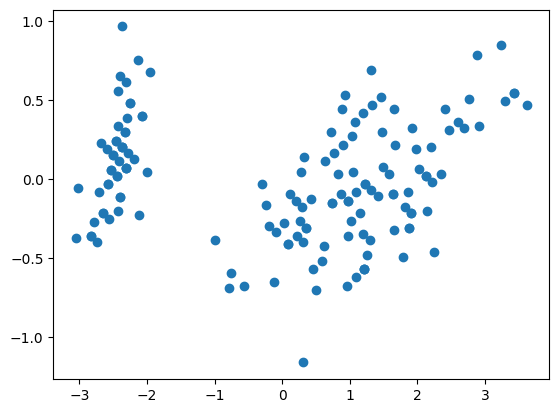

In [46]:
# page57

plt.scatter(PCscore[:,0], PCscore[:,1])
plt.show()

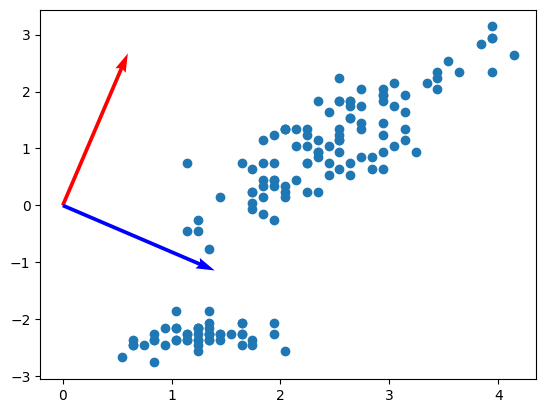

In [53]:
# page58

plt.scatter(dfmX[0], dfmX[1])
origin_x = [0, 0]
origin_y = [0, 0]
plt.quiver(origin_x,
           origin_y,
           [eigens_v[0, 0], eigens_v[0, 1]], # u (x-component of arrows)
           [eigens_v[1, 0], eigens_v[1, 1]], # v (y-component of arrows)
           color=["r","b"],scale=3)
plt.show()